In [67]:
import numpy as np
import tdadiag_vec as td
from importlib import reload
import matplotlib.pyplot as plt

In [ ]:
X = np.loadtxt("../R/unitCircle.csv", skiprows=1, delimiter=",")

In [164]:
reload(td);
TD = td.tdadiag_vect(X, threshold_=2)
_ = TD.calcDiag(inf=2)


In [168]:
test_dict = {"ps":TD.computePS, "nl":TD.computeNL, 
             "vab":TD.computeVAB, "ecc":TD.computeECC}
def compareResults(R_prefix = None):
    if R_prefix is not None:
        print(f"Comparing compute{R_prefix.upper()}:")
        func = test_dict[R_prefix]
        for d in range(2):
            pyth = func(homDim = d)
            R = np.loadtxt(f"../R/{R_prefix}_{d}.csv", skiprows=1)
            cond = np.allclose(pyth, R)
            print(f"\t dim={d}: {cond}")
            assert cond
    else:
        for pr in test_dict.keys():
            compareResults(pr)
compareResults()

Comparing computePS:
	 dim=0: True
	 dim=1: True
Comparing computeNL:
	 dim=0: True
	 dim=1: True
Comparing computeVAB:
	 dim=0: True
	 dim=1: True
Comparing computeECC:
	 dim=0: True
	 dim=1: True


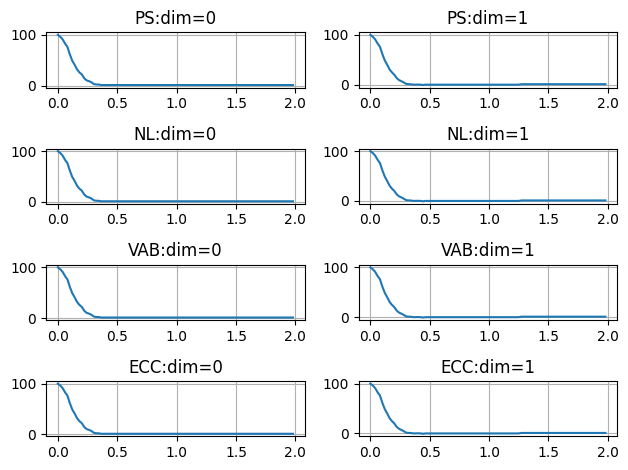

In [170]:
i = 1
for k in test_dict.keys():
    for d in range(2):
        xx = func(homDim = d, nGrid = 100)
        ax = plt.subplot(len(test_dict.keys()),2,i)
        ax.plot(TD.scale[:-1], xx)
        ax.set_title(f"{k.upper()}:dim={d}")
        ax.grid(True)   
        i += 1
plt.tight_layout()


Comparing computePS:
	 dim=0: True
	 dim=1: True
Comparing computeNL:
	 dim=0: True
	 dim=1: True
Comparing computeVAB:
	 dim=0: True
	 dim=1: True
Comparing computeECC:
	 dim=0: True
	 dim=1: True
